EXPLORE Data Science Academy Classification Hackathon

South African Language Identification Hack 2022

Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, we take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Importing Libraries

In [1]:
# Cleaning the Text Data

import nltk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
import seaborn as sns
import re 
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# Model building

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Model evaluation

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Warnigs
import warnings
warnings.filterwarnings("ignore")

# set plot style
sns.set()

# Exploring The Data

In [14]:
#Importing the given train data

df_train = pd.read_csv(r'C:\train_set.csv') 

df_test = pd.read_csv(r'C:\test_set.csv')



In [6]:
# Checking the first five rows to understand the structure of the data

df_train.head() 

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
#checking for null values in the train data

df_train.isnull().sum() 

lang_id    0
text       0
dtype: int64

In [8]:
#Checking the train data size - Number of rows and columns

df_train.shape 

(33000, 2)

In [9]:
#Checking the data types for each column in the train data

df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
#Viewing the number of Unique language IDs [lang_id] in our train data

type_sentiment = list(df_train.lang_id.unique())
print(type_sentiment) 

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [11]:
#Viewing the number of observations for the each language ID

df_train['lang_id'].value_counts() 


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

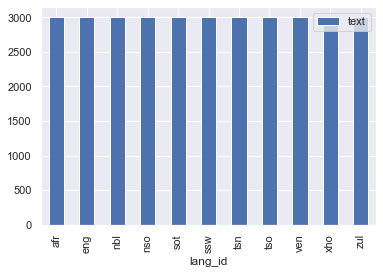

In [12]:
# Viewing text count by language IDs

sum_df_train = df_train[['lang_id', 'text']].groupby('lang_id').count()

sum_df_train.sort_values('text', ascending=False).plot(kind='bar')

plt.show()

The data is evenly distributed.

# Data Cleaning

In [13]:
#Dataset Cleaning Function

def Cleantext(text):
    # Converts from upper case to lower case
    text = text.lower()
    # removing numbers
    text = re.sub(r'\d+','',text)
    # removes punctuation
    text = ''.join([l for l in text if l not in string.punctuation])   
    # Removes extra white space
    text = re.sub(r'\s\s+','',text)

    return text


In [15]:
# Applying the Dataset Cleaning Function

df_train['text'] = df_train['text'].apply(Cleantext) 

df_test['text'] = df_test['text'].apply(Cleantext)


Tokenizing the texts

In [16]:
tokeniser = TreebankWordTokenizer()

df_train['tokens'] = df_train['text'].apply(tokeniser.tokenize)

df_test['tokens'] = df_test['text'].apply(tokeniser.tokenize)


In [17]:
#View tokenization

df_train.head() 


,lang_id,text,tokens
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [18]:
#Converting the tokens column from list to string

df_train['tokens'] = df_train['tokens'].apply(lambda x: ' '.join(map(str, x)))

df_test['tokens'] = df_train['tokens'].apply(lambda x: ' '.join(map(str, x)))


In [19]:
#Confirming the transformation

df_train.head() 

,lang_id,text,tokens
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Vectorizing The Text (Converting Text to Numbers)

In [42]:
#Vectorizing the tokens column of the data-sets

vect = CountVectorizer() 

X_count = vect.fit_transform(df_train['tokens'].values.astype(str)) 

x_test = vect.transform(df_test['tokens'].values.astype(str))

In [43]:
#Checking the shape of the result

X_count.shape

(33000, 145284)

Encoding the lang_id column of the train data

In [22]:
le = LabelEncoder()

# Fit label encoder and return encoded labels

y = le.fit_transform(df_train['lang_id'])

In [23]:
# List of label encoder types to use for lookup 

type_labels = [x for x in list(le.classes_)] 


In [24]:
#Checking the created list

type_labels 


['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']

In [25]:
#Checking the shape

y.shape 

(33000,)

In [26]:
#Spliting of train and test data

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=27) 

In [27]:
#Creating a dictionary of encoded labels for easy matching

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) 


In [28]:
#Checking the created dictionary

le_name_mapping 

{'afr': 0,
 'eng': 1,
 'nbl': 2,
 'nso': 3,
 'sot': 4,
 'ssw': 5,
 'tsn': 6,
 'tso': 7,
 'ven': 8,
 'xho': 9,
 'zul': 10}

# Model Building

Logistic Regression model

In [29]:
#Setting up the classifier 
lm = LogisticRegression() 

#Training the model
lm.fit(X_train, y_train) 

#Generating predictions
pred_lm = lm.predict(X_test) 

In [30]:
print("Weighted f1_score:", f1_score(y_test, pred_lm, average='weighted'))

print("\n\nClassification Report:\n\n", classification_report(y_test, pred_lm, target_names=type_labels))

Weighted f1_score: 0.9940860859359021


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       1.00      1.00      1.00       595
         nbl       0.99      0.98      0.98       607
         nso       1.00      0.99      1.00       573
         sot       1.00      1.00      1.00       572
         ssw       0.99      1.00      0.99       647
         tsn       1.00      1.00      1.00       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.98      0.99      0.99       598
         zul       0.98      0.98      0.98       631

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



SVM model

In [31]:
#Setting up the classifier
svc = SVC() 

#Training the model
svc.fit(X_train, y_train) 

#Generating predictions
svc_pred = svc.predict(X_test) 

In [32]:
print("Weighted f1_score:",f1_score(y_test, svc_pred, average='weighted'))

print("\n\nClassification Report:\n\n", classification_report(y_test, svc_pred, target_names=type_labels))

Weighted f1_score: 0.9918083363172638


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       0.99      1.00      1.00       595
         nbl       0.99      0.97      0.98       607
         nso       1.00      0.99      1.00       573
         sot       1.00      1.00      1.00       572
         ssw       0.99      1.00      0.99       647
         tsn       0.99      1.00      1.00       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.97      0.99      0.98       598
         zul       0.97      0.97      0.97       631

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



Multinomial Naive Bayes Model

In [33]:
#Setting up the classifier

model = MultinomialNB() 

#Training the model
model.fit(X_train, y_train) 

#Generating predictions
y_pred = model.predict(X_test) 

In [34]:
print("Weighted f1_score:", f1_score(y_test, y_pred, average='weighted'))

print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred, target_names=type_labels))


Weighted f1_score: 0.9984837203377328


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       0.99      1.00      1.00       595
         nbl       1.00      1.00      1.00       607
         nso       1.00      1.00      1.00       573
         sot       1.00      1.00      1.00       572
         ssw       1.00      1.00      1.00       647
         tsn       1.00      1.00      1.00       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       1.00      1.00      1.00       598
         zul       1.00      0.99      0.99       631

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



Best Performing Model

From the above classification reports, the best performing model is the Multinomial Naive Bayes with a Weighted F1 Score of 99.8% followed closely by Logistic Regression and Support Vector Machine.

We will proceed by applying hyperparameter tunining to the highest performing model (Multinomial Naive Bayes).

Hyperparameter Tuning on the best Performing Model

In [36]:
# Refining the train-test split for validation

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_count, y, test_size=0.01)


In [37]:
#Setting parameter grid

param_grid = {'alpha': [0.1, 1, 5, 10]} 
tuned_mnb = Pipeline([
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

#Fitting the model

tuned_mnb.fit(X_train, y_train)  

#Predicting the fit on validation set

y_pred_mnb = tuned_mnb.predict(X_test)  
print(classification_report(y_test, y_pred_mnb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       595
           2       1.00      1.00      1.00       607
           3       1.00      1.00      1.00       573
           4       1.00      1.00      1.00       572
           5       1.00      1.00      1.00       647
           6       1.00      1.00      1.00       568
           7       1.00      1.00      1.00       576
           8       1.00      1.00      1.00       601
           9       1.00      1.00      1.00       598
          10       1.00      0.99      0.99       631

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [38]:
ac = f1_score(y_test, y_pred_mnb, average='weighted')
cm = confusion_matrix(y_test, y_pred_mnb)

print("Weighted f1_score :",ac)


Weighted f1_score : 0.9986348005407202


# Creating a file for submission

In [45]:
#Generating predictions

Y_pred = tuned_mnb.predict(x_test) 

In [46]:
#Creating a dataframe with the predictions

submission = pd.DataFrame({'index':df_test['index'],'lang_id':Y_pred}) 


In [47]:
#Replacing the encoded 'lang_id' column with its appropriate values

submission['lang_id'] = submission['lang_id'].replace(list(le_name_mapping.values()),list(le_name_mapping.keys()))

In [48]:
#Checking the created dataframe for correctness

submission.head() 

,index,lang_id
0,1,tsn
1,2,tsn
2,3,tsn
3,4,tsn
4,5,tsn


In [51]:
submission.to_csv(r'C:\Users\Consultant\Desktop\submission', index = False)

